## Manjiri Ramesh Pendharkar - 45933219

Github url - https://github.com/MQCOMP2200-S2-2020/portfolio-2020-manjiri2077

 ## Portfolio 2
The goal of the second portfolio is to predicting the appliance energy usage of a house based on Internet of Things (IoT) measurements of temperature and humidity and weather observations.
The dataset is provided in the form of two csv files  named training.csv and testing.csv.
In this portfolio, we will be doing some exploratory data analysis to analyze the given datasets to summarize their main characteristics with visual methods. Then we will fit a linear regression model to predict appliances energy usage of a house based on  temperature, humidity and weather measurements and generate evaluation metrics. The last task is to apply Recursive Feature Estimation to the data to select the best features.

In [1]:
import os
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFE
import matplotlib.dates as mdates
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
from datetime import datetime

import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# defining mean_absolute_percentage_error function
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [3]:
# reading training data
train = pd.read_csv('data/training.csv')
train.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,61200,Weekday,Monday
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,61800,Weekday,Monday
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,62400,Weekday,Monday
3,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,63600,Weekday,Monday
4,2016-01-11 17:50:00,50,40,19.89,46.026667,19.2,44.500000,19.79,44.933333,18.890000,...,734.0,92.0,5.333333,43.833333,4.8,44.919484,44.919484,64200,Weekday,Monday


In [4]:
# reading testing data
test = pd.read_csv('data/testing.csv')
test.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,NSM,WeekStatus,Day_of_week
0,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.79,45.000000,18.89,...,733.800000,92.000000,6.000000,51.5,5.000000,45.410389,45.410389,63000,Weekday,Monday
1,2016-01-11 18:00:00,60,50,19.890000,45.766667,19.200000,44.500000,19.79,44.900000,18.89,...,734.100000,92.000000,5.000000,40.0,4.700000,47.233763,47.233763,64800,Weekday,Monday
2,2016-01-11 18:40:00,230,70,19.926667,45.863333,19.356667,44.400000,19.79,44.900000,18.89,...,734.366667,91.333333,5.666667,40.0,4.633333,10.298729,10.298729,67200,Weekday,Monday
3,2016-01-11 18:50:00,580,60,20.066667,46.396667,19.426667,44.400000,19.79,44.826667,19.00,...,734.433333,91.166667,5.833333,40.0,4.616667,8.827838,8.827838,67800,Weekday,Monday
4,2016-01-11 19:30:00,100,10,20.566667,53.893333,20.033333,46.756667,20.10,48.466667,19.00,...,734.850000,89.500000,6.000000,40.0,4.350000,24.884962,24.884962,70200,Weekday,Monday


In [5]:
print(train.shape)
print(test.shape)

(14803, 32)
(4932, 32)


In [6]:
train.columns

Index(['date', 'Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3',
       'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM', 'WeekStatus',
       'Day_of_week'],
      dtype='object')

In [7]:
# Pandas to_datetime() method helps to convert string Date time into Python Date time object.
train['date1']= pd.to_datetime(train['date'])

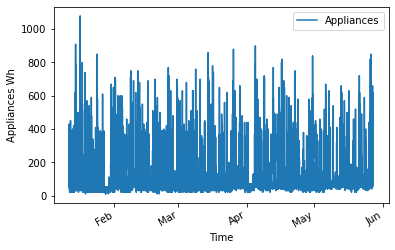

In [8]:
# for getting months and then plotting graph
locator=mdates.MonthLocator()
a = mdates.DateFormatter('%b')
train.plot(x='date1',y='Appliances')
plt.ylabel("Appliances Wh")
plt.xlabel("Time")
X =plt.gca().xaxis
X.set_major_locator(locator)
X.set_major_formatter(a)
plt.show()

The graph suggest that energy usage of the appliances is higher in the month of January as compared to the first six months. However, overall the energy usage is quite uniform.

Text(0.5, 0, 'Time')

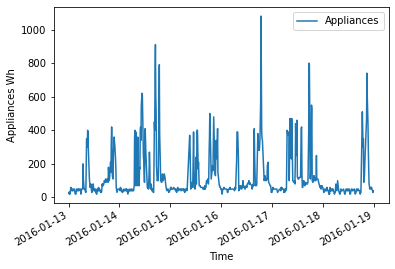

In [9]:
# startdate and enddate to indicate the start and end of the week which is then passed into unnamed function 
startdate= '2016-01-13'
enddate= '2016-01-19'
df=train[train['date1'].apply(lambda x:x > datetime.strptime(startdate, '%Y-%m-%d') 
                              and x < datetime.strptime(enddate, '%Y-%m-%d'))]
df.plot(x='date1',y='Appliances')
plt.ylabel("Appliances Wh")
plt.xlabel("Time")

Appliances energy consumption is highest on the end of day 2016-01-16 which is more than 1000 Wh.

Text(0, 0.5, 'Frequency')

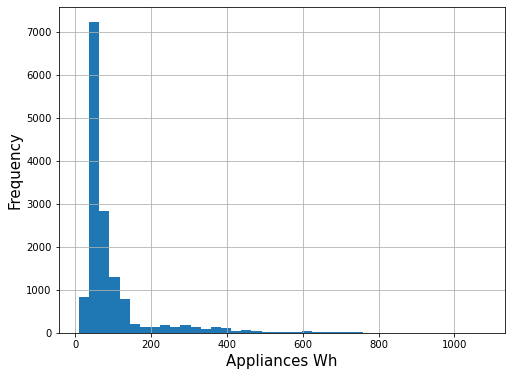

In [10]:
plt.figure(figsize=(8,6))
train['Appliances'].hist( histtype = 'stepfilled', bins = 40)
plt.xlabel("Appliances Wh", fontsize=15)
plt.ylabel("Frequency",fontsize=15)

The above histogram shows the frequency of appliances energy consumption. The graph suggests that the distribution of appliances energy usage is right-skewed in nature. This is a unimodal data set, with the mode closer to the left of the graph.

Text(0.5, 0, 'Appliances Wh')

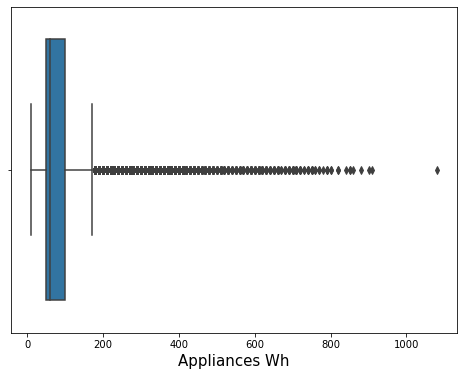

In [11]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Appliances', data=train)
plt.xlabel("Appliances Wh", fontsize=15)

From the boxplot, we can say that the median of appliance energy cosumption is approximately at around 60 Wh. Also 50 percent of the data has energy consumption between 40 and 100 Wh. However, there are many outliers in the dataset. 

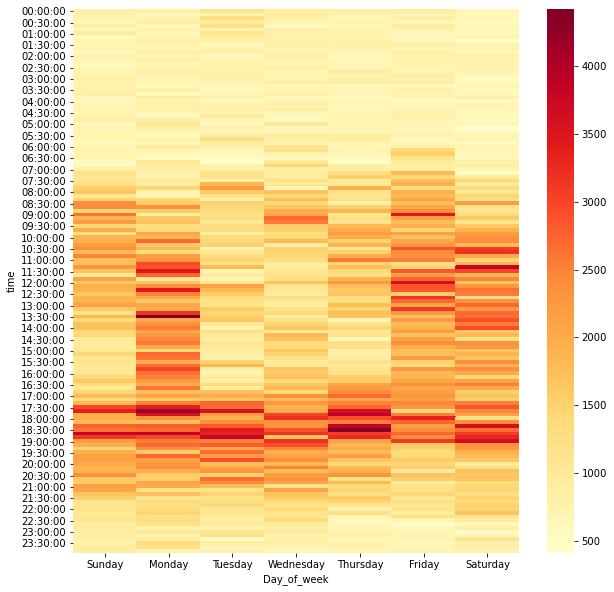

In [12]:
train['time']=pd.to_datetime(train['date1']).dt.time
map= train.groupby(['time','Day_of_week']).sum()['Appliances'].unstack()
map=map[['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']]
plt.figure(figsize=(10,10))
ax=plt.subplot(111)
sns.heatmap(map,cmap='YlOrRd')

An hourly heat map is created for training data to identify any time trends. The heatmap shows that there is a strong time component in the energy consumption pattern. The energy consumption starts to rise around 6 in the morning. Then around noon, there are energy load surges. The energy demand also increases around 6 pm every day of the week. 

In [13]:
# a function to display correlation in the pairgrid
def disp_pearson(x, y, **kws):
    corrmat = np.corrcoef(x,y)
    pearson = round(corrmat[0, 1], 2)
    ax = plt.gca()
    ax.annotate(pearson, [.5, .5], xycoords = "axes fraction", ha = "center", va='center', fontsize = 30)

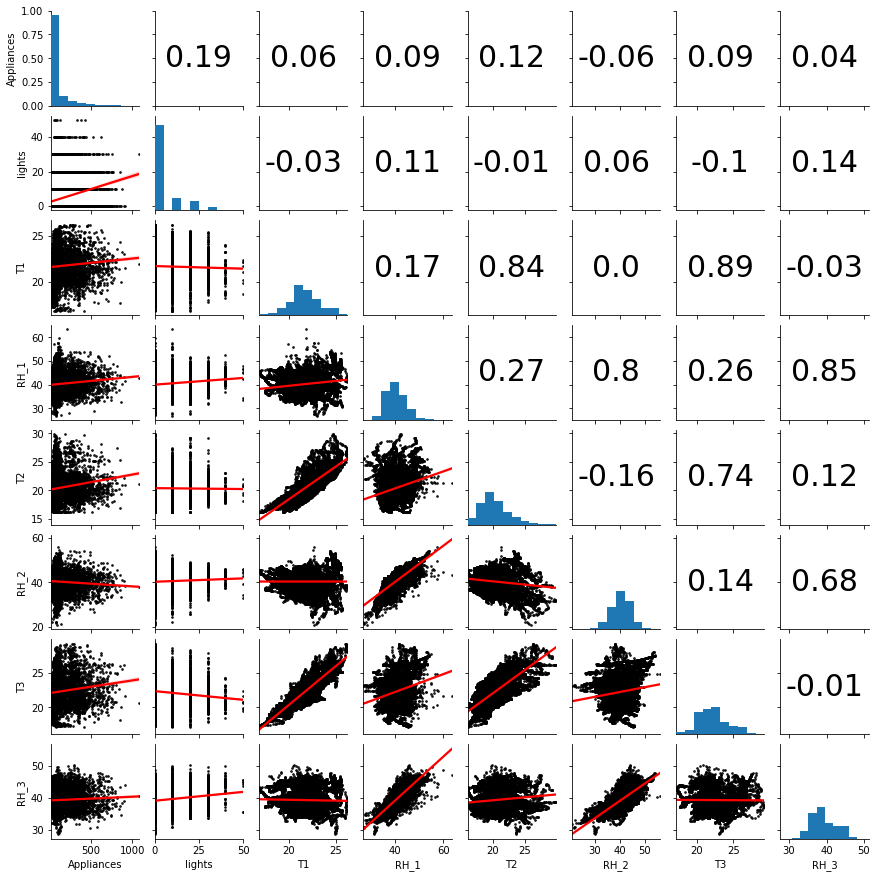

In [14]:
# to display pairgrid 
scatterdata = train[['Appliances', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)

There is a positive correlation between the energy consumption of appliances and
lights (0.19). The second largest correlation is between appliances and T2 (0.12).
For the indoor temperatures, the correlations are high as found between T1 and T3.

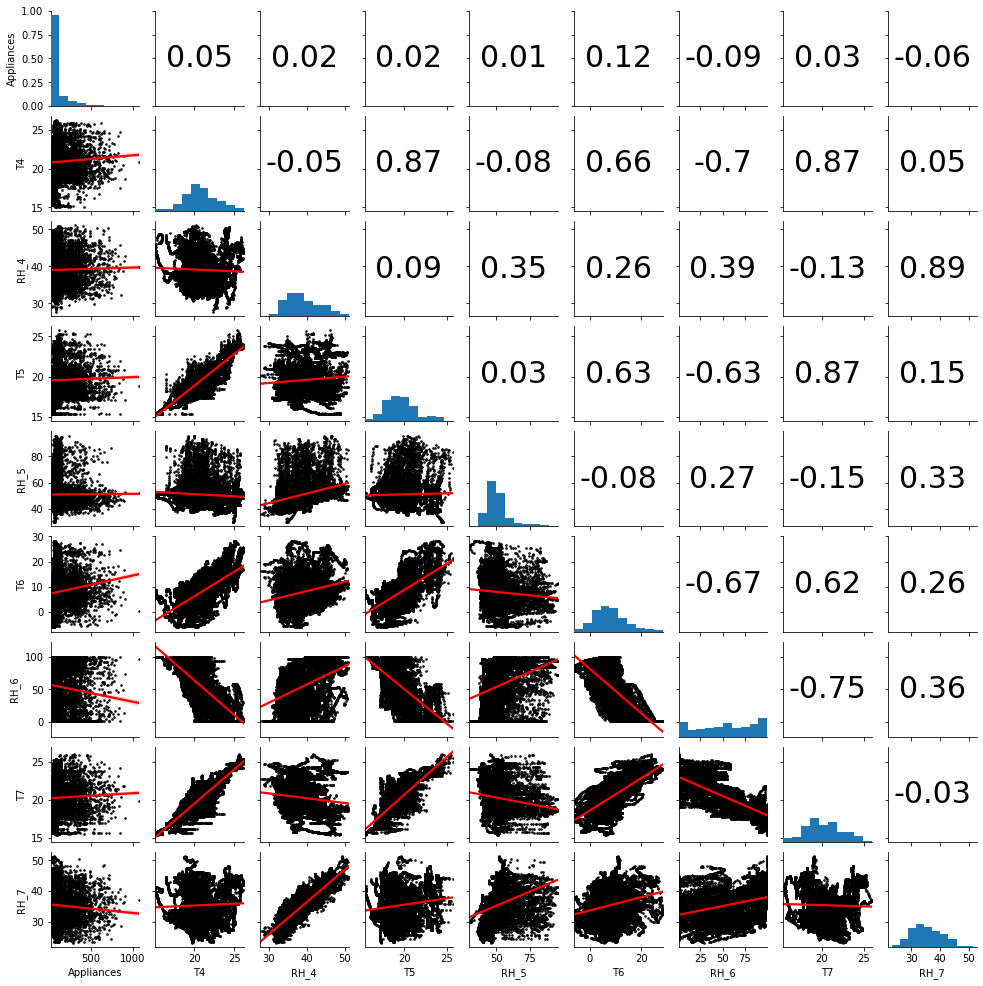

In [15]:
# to display pairgrid 
scatterdata = train[['Appliances', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)

Appliances energy usage is negatively correlated to RH_6 (-0.09) and followed by RH_7 (-0.06). The is a positive correlation between appliances and T6. But this correlation is also very low. However, appliances energy usage does not vary in predictable way with the rest of the above variables.

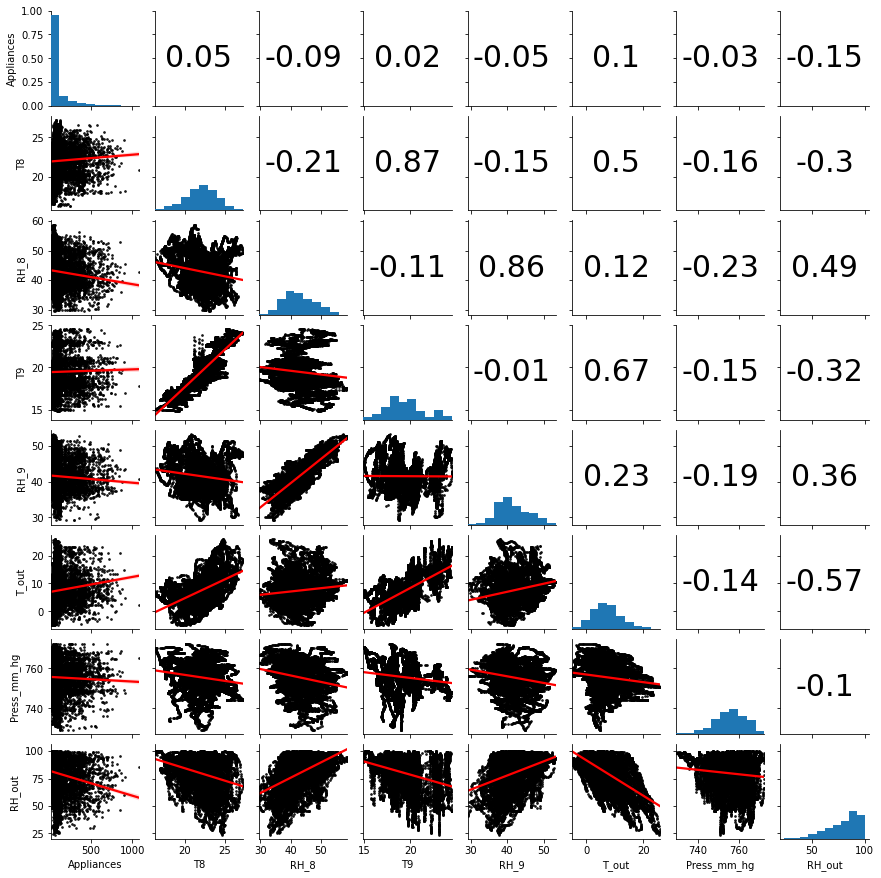

In [16]:
# to display pairgrid 
scatterdata = train[['Appliances', 'T8','RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)

Appliances energy usage is negatively correlated to RH_out (-0.15) which is outside humidity which means as the value of one variable increases, the value of another variable decreases.

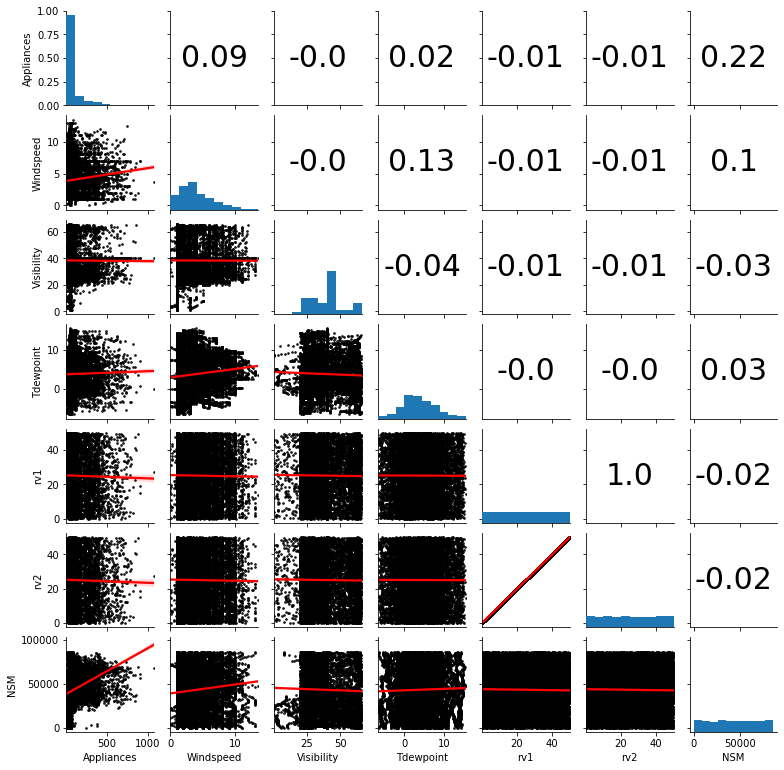

In [17]:
# to display pairgrid 
scatterdata = train[['Appliances', 'Windspeed','Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM']]

s = sns.PairGrid(scatterdata, height =1.5)
s = s.map_diag(plt.hist)
s = s.map_lower(sns.regplot, color = 'k', scatter_kws={"s":3}, line_kws={'color' :'r'})
s = s.map_upper(disp_pearson)

 Appliances is positively correlated to NSM which is about 0.22 and Windspeed which is about 0.09. 

### Modelling using numeric features only 

In [18]:
X_train = train.drop(['date','Appliances', 'WeekStatus','Day_of_week','date1','time'],axis=1)
y_train = train['Appliances']
X_test = test.drop(['date','Appliances', 'WeekStatus','Day_of_week'],axis=1)
y_test = test['Appliances']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14803, 28)
(14803,)
(4932, 28)
(4932,)


In [19]:
# instantiating model
model1 = linear_model.LinearRegression()

# model training
model1.fit(X_train,y_train)

#making predictions on training and testing data
y_train_predictions=model1.predict(X_train)
y_test_predictions=model1.predict(X_test)

print("On training data")
print()
print("RMSE:",np.sqrt(mean_squared_error(y_train, y_train_predictions)))
print("R Squared:",r2_score(y_train, y_train_predictions))
print("MAE:", mean_absolute_error(y_train,y_train_predictions))
print("MAPE", mean_absolute_percentage_error(y_train,y_train_predictions))
print()
print()
print("On testing data")
print()
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_test_predictions)))
print("R Squared:",r2_score(y_test, y_test_predictions))
print("MAE:", mean_absolute_error(y_test,y_test_predictions))
print("MAPE", mean_absolute_percentage_error(y_test,y_test_predictions))

On training data

RMSE: 93.57143468503801
R Squared: 0.17188056846730493
MAE: 53.255031292956744
MAPE 61.49412441844259


On testing data

RMSE: 93.5642512088766
R Squared: 0.15199183390308502
MAE: 52.07501531659541
MAPE 60.104750966771306


Approximately 17 and 15 percentage of the response (appliance) variable variation is explained by a linear model on training and testing dataset respectively. But the errors such as Mean Absolute Error (MAE), Mean absolute percentage error (MAPE) and Root mean squared error (RMSE) have high values. 

#### Converting WeekStatus and Day_of_week into dummy variables

In [20]:
set(train['WeekStatus'])

{'Weekday', 'Weekend'}

In [21]:
train_status = pd.get_dummies(train['WeekStatus'])
test_status = pd.get_dummies(test['WeekStatus'])
train_status.head()

,Weekday,Weekend
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [22]:
train_day = pd.get_dummies(train['Day_of_week'])
test_day = pd.get_dummies(test['Day_of_week'])
train_day.head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0
4,0,1,0,0,0,0,0


In [23]:
# joining transformed week status to the train_df and test_df 
train_df=train.join(train_status)
test_df=test.join(test_status)

In [24]:
# joining transformed day_of_week to the train_full and test_full
train_full=train_df.join(train_day)
test_full=test_df.join(test_day)

In [25]:
# train_full and test_full contains all the numeric features
# note: here shape of train_full has extra columns because extra columns were created during 
#       reformatting ( eg time and date column) for building heatmap
print(train_full.shape)
print(test_full.shape)

(14803, 43)
(4932, 41)


### Modelling using all features

In [26]:
X_train = train_full.drop(['date','Appliances', 'WeekStatus','Day_of_week','date1','time'],axis=1)
y_train = train_full['Appliances']
X_test = test_full.drop(['date','Appliances', 'WeekStatus','Day_of_week'],axis=1)
y_test = test_full['Appliances']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14803, 37)
(14803,)
(4932, 37)
(4932,)


In [27]:
# instantiating model
model2 = linear_model.LinearRegression()

# model training
model2.fit(X_train,y_train)

#making predictions on training and testing data
y_train_predictions=model2.predict(X_train)
y_test_predictions=model2.predict(X_test)

print("On training data")
print()
print("RMSE:",np.sqrt(mean_squared_error(y_train, y_train_predictions)))
print("R Squared:",r2_score(y_train, y_train_predictions))
print("MAE:", mean_absolute_error(y_train,y_train_predictions))
print("MAPE", mean_absolute_percentage_error(y_train,y_train_predictions))
print()
print()
print("On testing data")
print()
print("RMSE:",np.sqrt(mean_squared_error(y_test, y_test_predictions)))
print("R Squared:",r2_score(y_test, y_test_predictions))
print("MAE:", mean_absolute_error(y_test,y_test_predictions))
print("MAPE", mean_absolute_percentage_error(y_test,y_test_predictions))

On training data

RMSE: 93.20557248110671
R Squared: 0.17834376492372517
MAE: 53.13891233505175
MAPE 61.331174880920734


On testing data

RMSE: 93.17643426587789
R Squared: 0.15900712778674597
MAE: 51.984929609380174
MAPE 59.95512561147064


Approximately 18 and 16 percentage of the response (appliances) variable variation is explained by a linear model on training and testing dataset respectively. But the errors such as Mean Absolute Error (MAE), Mean absolute percentage error (MAPE) and Root mean squared error (RMSE) have high values. 


## Feature importance using RFE

In [28]:
# rmse_scores is a list containing rmse scores for n number of features included
estimator = linear_model.LinearRegression()
rmse_scores =[]
for i in range(1,33):
    selector =RFE (estimator,n_features_to_select=i, step=1)
    selector = selector.fit(X_train,y_train)
    y_test_pred = selector.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test,y_test_pred))
    rmse_scores.append( rmse_test)

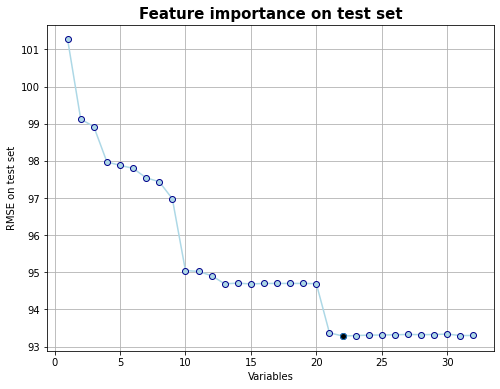

In [29]:
best = 1
for item in rmse_scores:
    if item < rmse_scores[best - 1]:
        best = rmse_scores.index(item) + 1

plt.figure(figsize=(8,6))
plt.grid()
plt.xlabel('Variables')
plt.ylabel('RMSE on test set')
plt.title('Feature importance on test set', fontsize=15, fontweight ='bold')
plt.plot(range(1,33), rmse_scores,marker='o',color='lightblue',markeredgewidth=1,markeredgecolor='DarkBlue')
plt.plot(best, rmse_scores[best-1], marker = 'o', markerfacecolor = 'black')
plt.show()

RMSE scores on test dataset decreases until it reaches 22 variables and then remains quite constant.
The optimal number of predictors (22) is shown with the black dot.

In [30]:
# rfecv for cross-validated selection of the best number of features.
model = linear_model.LinearRegression()
k = StratifiedKFold(n_splits=10, random_state=42)
rfecv = RFECV(estimator=model, step=1, cv=k, scoring='neg_mean_squared_error')
rfecv = rfecv.fit(X_train, y_train)

C:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(
C:\Programs\Anaconda\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


In [31]:
print('Optimal number of features :', rfecv.n_features_)
print('Best features :', X_train.columns[rfecv.support_])

Optimal number of features : 22
Best features : Index(['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T6', 'T8', 'RH_8',
       'T9', 'T_out', 'Windspeed', 'Weekday', 'Weekend', 'Friday', 'Monday',
       'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')


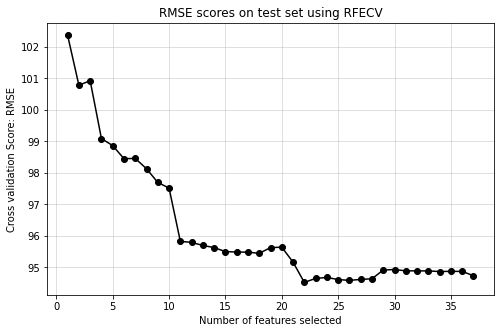

In [32]:
# Plot number of features VS. cross-validation scores RMSE
plt.figure(figsize=(8,5))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation Score: RMSE")
plt.title('RMSE scores on test set using RFECV')

rmse_cv_scores = np.sqrt(-rfecv.grid_scores_)

p = plt.plot(range(1, len(rfecv.grid_scores_) + 1), rmse_cv_scores, marker='o', color='black')
plt.grid(alpha=0.5)
plt.show()

Cross validation Score on RMSE on test dataset decreases until it reaches 22 variables and then shows slight inclination.

## Conclusion

From the correlation matrix, we can say that the correlation between the energy consumption of appliances and other variables is quite low in general. 
The r-squared value for training and testing data increases by one percentage when all variables are included in the model as compared to modelling using only numeric features for predicting appliance energy consumption. Approximately 18 and 16 percentage of the response (appliance) variable variation is explained by a linear model on training and testing dataset repectively. However, Mean Absolute Error (MAE), Mean absolute percentage error (MAPE) and Root mean squared error (RMSE) are approximately 53, 60 and 93 respectivey which is quite bad because of it's high value.
The linear regression model on the training and testing data to predict the appliance energy usage of a house based on Internet of Things (IoT) measurements of temperature and humidity and weather observations isn't very good. We might need to go on to use other models that provide better predictions.